<a href="https://www.kaggle.com/code/mesutssmn/gold-usd-price-prophet-prediction?scriptVersionId=132804528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-usd-price-dataset/Gold-USD Price.csv


In [2]:
!pip install Prophet > pip_log.txt
from prophet import Prophet

In [3]:
df = pd.read_csv('/kaggle/input/gold-usd-price-dataset/Gold-USD Price.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5711 non-null   object 
 1   Open       5711 non-null   float64
 2   High       5711 non-null   float64
 3   Low        5711 non-null   float64
 4   Close      5711 non-null   float64
 5   Adj Close  5711 non-null   float64
 6   Volume     5711 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 312.4+ KB


In [6]:
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
df.nunique()

Date         5711
Open         4448
High         4426
Low          4405
Close        4501
Adj Close    4501
Volume       1442
dtype: int64

In [8]:
df['Date'].unique()

array(['2000-08-30T00:00:00.000000000', '2000-08-31T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', ...,
       '2023-05-31T00:00:00.000000000', '2023-06-01T00:00:00.000000000',
       '2023-06-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [9]:
np.where(df['Date']=='2023-06-01')

(array([5709]),)

/tmp/ipykernel_20/1636675770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',annot=True,fmt='.4f')


<Axes: >

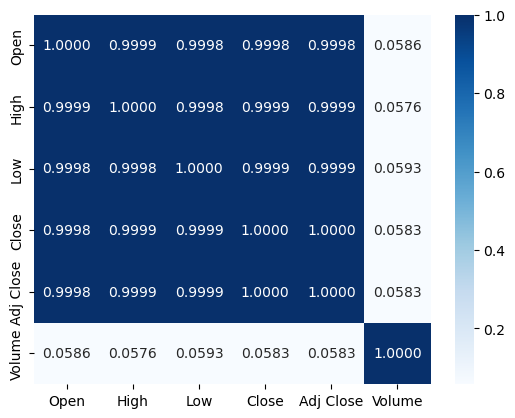

In [10]:
sns.heatmap(df.corr(),cmap='Blues',annot=True,fmt='.4f')

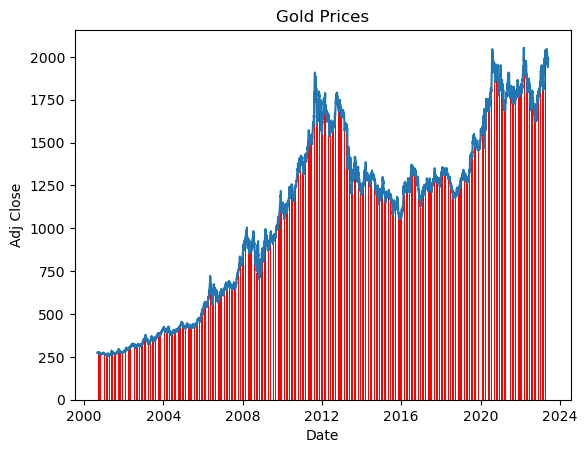

In [11]:
plt.plot(df['Date'],df['Open'])
plt.bar(df['Date'],df['Adj Close'],color='r')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Gold Prices')
plt.show()

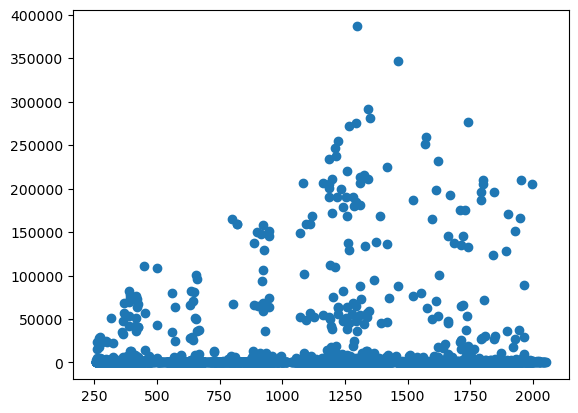

In [12]:
plt.scatter(df['Open'],df['Volume'])
plt.show()

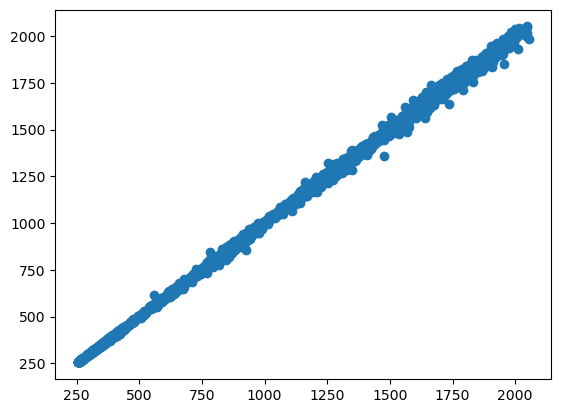

In [13]:
plt.scatter(df['Open'],df['Adj Close'])

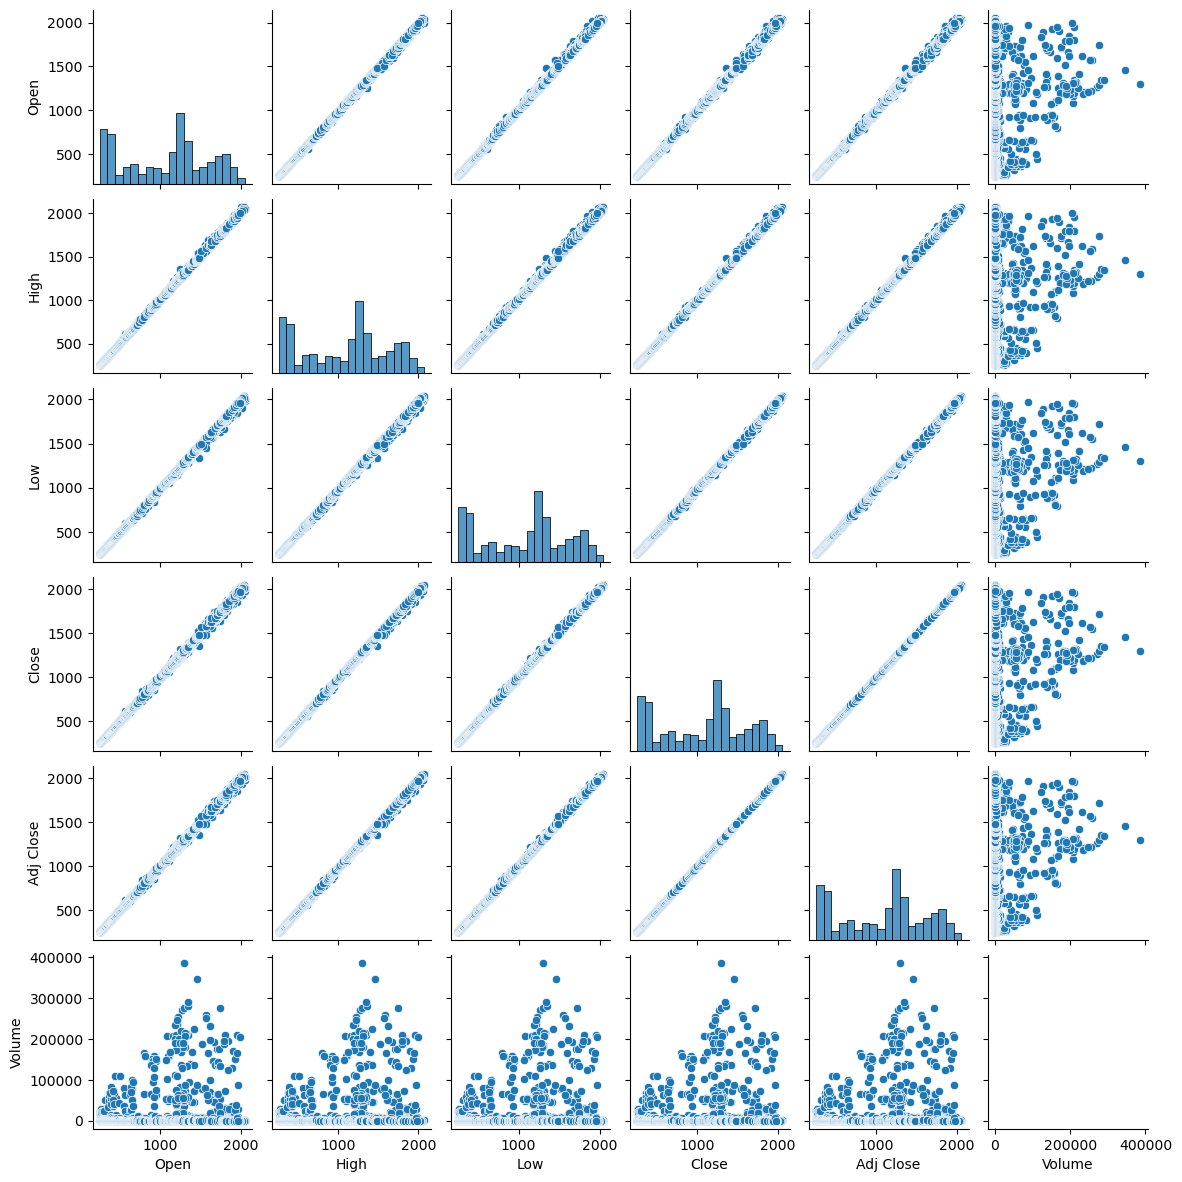

In [14]:
sns.pairplot(data = df, height = 2) 

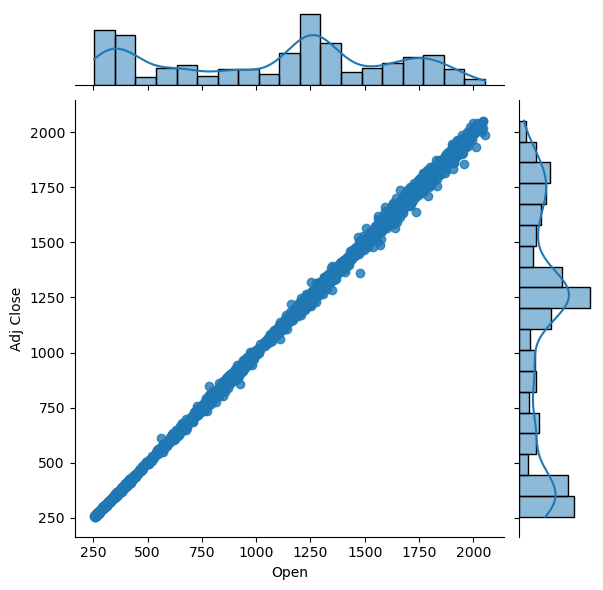

In [15]:
sns.jointplot(data = df,x = "Open", y = "Adj Close", kind='reg');

<Figure size 1200x500 with 0 Axes>

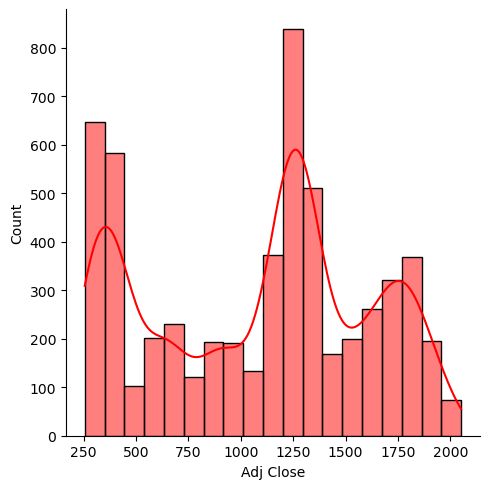

In [16]:
plt.figure(figsize=(12,5))
sns.displot(df,x="Adj Close", color = 'r',kde=True)
plt.show()

<Axes: xlabel='Date', ylabel='High'>

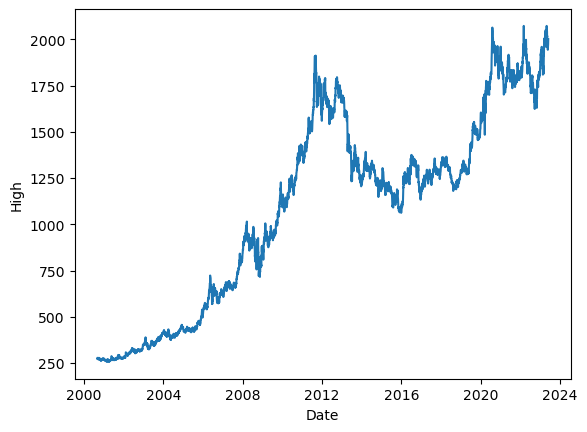

In [17]:
sns.lineplot(data=df,x='Date',y='High')

<Axes: xlabel='Adj Close', ylabel='High'>

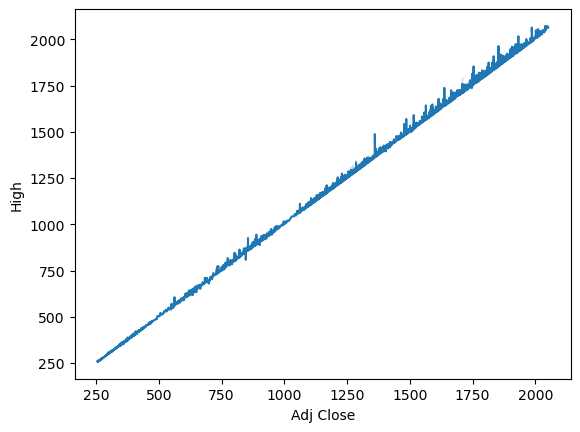

In [18]:
sns.lineplot(data=df,x='Adj Close',y='High')

In [19]:
df1 = df.rename(columns={'Date':'ds','Adj Close':'y'})

In [20]:
df1=df1[["ds","y"]]

In [21]:
df1.head(3)

,ds,y
0,2000-08-30,273.899994
1,2000-08-31,278.299988
2,2000-09-01,277.000000


In [22]:
model=Prophet()
model.fit(df1)

12:21:02 - cmdstanpy - INFO - Chain [1] start processing
12:21:05 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future=model.make_future_dataframe(periods=365)

In [24]:
future

,ds
0,2000-08-30
1,2000-08-31
2,2000-09-01
3,2000-09-05
4,2000-09-06
...,...
6071,2024-05-28
6072,2024-05-29
6073,2024-05-30
6074,2024-05-31


In [25]:
pred=model.predict(future)

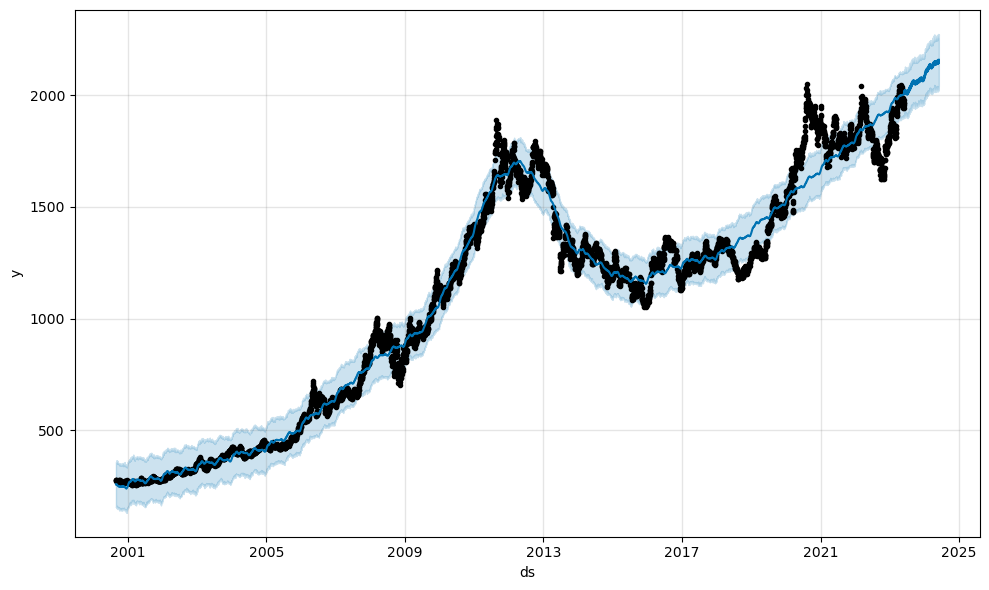

In [26]:
model.plot(pred);

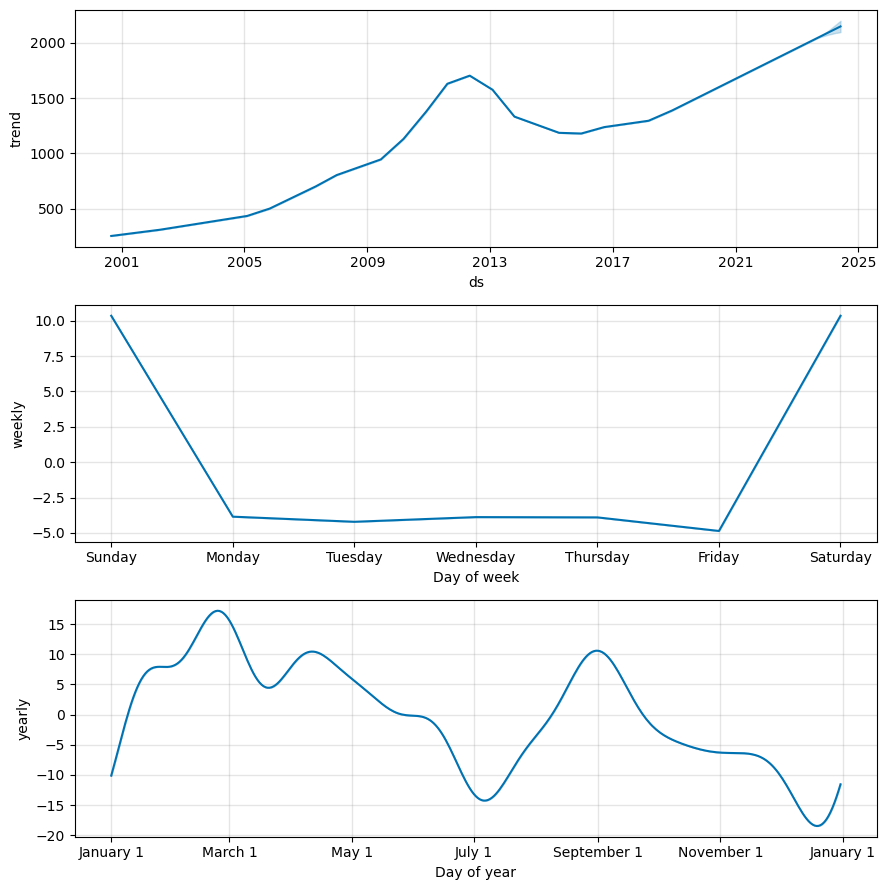

In [27]:
model.plot_components(pred);